**Marta Amores**

#Práctica 2#


Debemos crear un modelo de Red de Neuronas Convolucionales, estas capas nos ayudarán al mejor reconocimiento de imágenes, para que nuestro modelo sea capaz de reconocer y clasificar imágenes. 
Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  


Para entender mejor que son las redes convolucionales, sabemos que soy muy similares a las densamente conectadas (Dense), estas tienen pesos y sesgos y son capaces de aprender. 
La diferencia es que las redes convolucionales suponen que las entradas son imágenes, esto hace que podamos identificar diferentes propiedades de las imágenes, más allá de las Dense. 
Lo que realmente hacen las capas convolucionales es, antes de saber que es una boca o un ojo, saber identificar las líneas, texturas o formas, que sean similares a ellas. Después aprender la disposición de estos, es decir, una boca siempre va a estar debajo de la nariz, finalmente ya aprenderá lo que es una boca o un ojo. 



In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


Comprobamos que nuestra versión es posterior a 2.0.0

Crgamos todas las librerías necesarías para poder entrenar nuestro modelo.
Nos aseguramos que tenemos los datos en la forma que necesitamos. 

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

assert train_images.shape==(60000,28,28)
assert test_images.shape==(10000,28,28)
assert train_labels.shape==(60000,)
assert test_labels.shape==(10000,)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels=test_labels.reshape((10000,1))
train_labels=train_labels.reshape((60000,1))



4422102/4422102 [==============================] - 0s 0us/step


Comprobamos que los datos tienen la forma esperada.


#Definición de los modelos

##Caso 1##

In [3]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64,(5,5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(10,'softmax'))

print("CASO 1 \n")
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print("FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model1.summary()



CASO 1 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 

TAMAÑO DE LA CAPA POOLING: 2x2 

FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: sgd 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                       

Nuestra función **summary** de nuestro CASO 1 nos indica:
El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
*   La primera capa convolucional es, ((5x5)+1)x32=832 parámetros.
*   La primera capa pooling no suma parámetros porque no aprende, 24/2=12
*   La segunda capa convolucional es, (((5x5)x32)+1)x64=51264 parámetros.
*   La segunda capa pooling no suma parámetros porque no aprende, 8/2=4
*   La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
*   La última capa dense es, (((1024)x10))+10)=10250 parámetros.

En total de los parámetros que hemos encontrado es:  62.346

In [4]:
model1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

Entrenamos nuestro modelo con 5 épocas.

In [5]:
 historia1=model1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 53s 110ms/step - loss: 1.3226 - accuracy: 0.5536 - val_loss: 0.7611 - val_accuracy: 0.7301
Epoch 2/5
480/480 [==============================] - 54s 112ms/step - loss: 0.7208 - accuracy: 0.7361 - val_loss: 0.6447 - val_accuracy: 0.7669
Epoch 3/5
480/480 [==============================] - 54s 112ms/step - loss: 0.6218 - accuracy: 0.7731 - val_loss: 0.5721 - val_accuracy: 0.7968
Epoch 4/5
480/480 [==============================] - 51s 107ms/step - loss: 0.5658 - accuracy: 0.7957 - val_loss: 0.5399 - val_accuracy: 0.8065
Epoch 5/5
480/480 [==============================] - 51s 107ms/step - loss: 0.5263 - accuracy: 0.8109 - val_loss: 0.5055 - val_accuracy: 0.8199


In [6]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [7]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

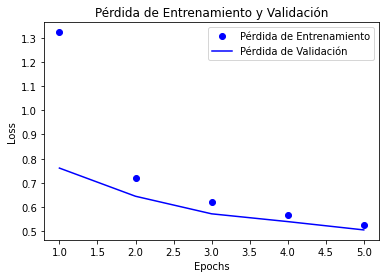

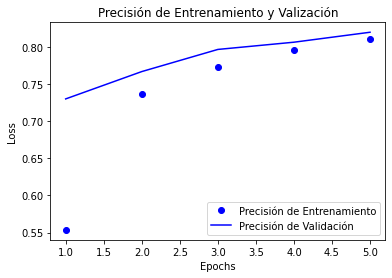

In [8]:
pinta_perdida_entrenamiento_validacion(historia1)
pinta_precision_entrenamiento_validacion(historia1)


#Caso 2

In [13]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128,(3,3), padding = 'same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10,'softmax'))

print("CASO 2 \n")
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print('CAPA PADDING: same \n')
print('TAMAÑO ÚLTIMA CAPA DENSE: 65 \n')
print("FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model2.summary()

CASO 2 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 

TAMAÑO DE LA CAPA POOLING: 2x2 

CAPA PADDING: same 

TAMAÑO ÚLTIMA CAPA DENSE: 65 

FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: sgd 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                           

Nuestra función **summary** de nuestro CASO 2 nos indica:
El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
*   La primera capa convolucional es, ((7x7)+1)x64=3200 parámetros.
*   La primera capa pooling no suma parámetros porque no aprende, 28/2=14
*   La segunda capa convolucional es, (((3x3)x64)+1)x128=73856 parámetros.
*   La segunda capa pooling no suma parámetros porque no aprende, 14/2=7
*   La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
*   La penúltima capa dense es, (((6272)x65))+65)=407745 parámetros.
*   La última capa dense es, (65x10)+10=660

En total de los parámetros que hemos encontrado es:  485.461

In [14]:
model2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [15]:
 historia2=model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 182s 378ms/step - loss: 1.1165 - accuracy: 0.6127 - val_loss: 0.7460 - val_accuracy: 0.7311
Epoch 2/5
362/480 [=====================>........] - ETA: 41s - loss: 0.6999 - accuracy: 0.7441

KeyboardInterrupt: ignored

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)
pinta_precision_entrenamiento_validacion(historia2)

#Caso 3

In [16]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128,(3,3), padding = 'same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10,'softmax'))

print("CASO 3 \n")
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print('CAPA PADDING: same \n')
print('TAMAÑO ÚLTIMA CAPA DENSE: 65 \n')
print("FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: adam \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model3.summary()

CASO 3 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 

TAMAÑO DE LA CAPA POOLING: 2x2 

CAPA PADDING: same 

TAMAÑO ÚLTIMA CAPA DENSE: 65 

FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: adam 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                         

Nuestra función **summary** de nuestro CASO 3 nos indica:
El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
*   La primera capa convolucional es, ((7x7)+1)x64=3200 parámetros.
*   La primera capa pooling no suma parámetros porque no aprende, 28/2=14
*   La segunda capa convolucional es, (((3x3)x64)+1)x128=73856 parámetros.
*   La segunda capa pooling no suma parámetros porque no aprende, 14/2=7
*   La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
*   La penúltima capa dense es, (((6272)x65))+65)=407745 parámetros.
*   La última capa dense es, (65x10)+10=660
En total de los parámetros que hemos encontrado es:  485.461

In [17]:
model3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics='accuracy')

In [18]:
 historia3= model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 4s 8ms/step - loss: 0.4927 - accuracy: 0.8258 - val_loss: 0.3507 - val_accuracy: 0.8712
Epoch 2/5
480/480 [==============================] - 4s 8ms/step - loss: 0.3122 - accuracy: 0.8876 - val_loss: 0.3112 - val_accuracy: 0.8875
Epoch 3/5
480/480 [==============================] - 4s 7ms/step - loss: 0.2651 - accuracy: 0.9029 - val_loss: 0.2967 - val_accuracy: 0.8878
Epoch 4/5
480/480 [==============================] - 4s 8ms/step - loss: 0.2361 - accuracy: 0.9137 - val_loss: 0.2893 - val_accuracy: 0.8950
Epoch 5/5
480/480 [==============================] - 4s 8ms/step - loss: 0.2126 - accuracy: 0.9214 - val_loss: 0.2501 - val_accuracy: 0.9057


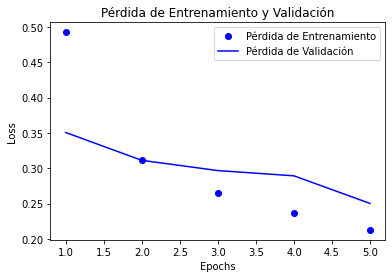

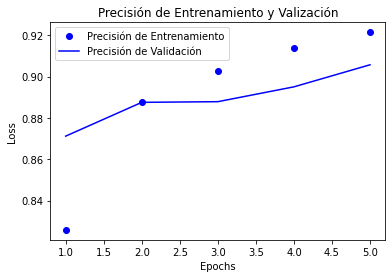

In [19]:
pinta_perdida_entrenamiento_validacion(historia3)
pinta_precision_entrenamiento_validacion(historia3)

#Caso 4



En este caso, utilizaremos el **mismo modelo** que el CASO 1, con la diferencia que lo entrenaremos 25 épocas.

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64,(5,5), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(10,'softmax'))


print('CASO 1 (25 épocas de entrenamiento) \n')
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print("FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model_1.summary()


CASO 1 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 10)     

In [ ]:
model_1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [ ]:
model_1.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
600/600 [==============================] - 2s 3ms/step - loss: 1.2380 - accuracy: 0.5915
Epoch 2/25
600/600 [==============================] - 2s 3ms/step - loss: 0.6551 - accuracy: 0.7597
Epoch 3/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5715 - accuracy: 0.7933
Epoch 4/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5247 - accuracy: 0.8114
Epoch 5/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4916 - accuracy: 0.8246
Epoch 6/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4666 - accuracy: 0.8341
Epoch 7/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4469 - accuracy: 0.8426
Epoch 8/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4313 - accuracy: 0.8479
Epoch 9/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4182 - accuracy: 0.8529
Epoch 10/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4059 - accuracy: 0.8569

# Caso 5



In [ ]:
model__1 = Sequential()
model__1.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model__1.add(MaxPooling2D((2, 2)))
model__1.add(Conv2D(64,(5,5), activation='tanh'))
model__1.add(MaxPooling2D((2, 2)))
model__1.add(Flatten())
model__1.add(Dense(10,'softmax'))


print('CASO 1 (función de activación tanh) \n')
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print("FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: tanh  \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')
model__1.summary()


CASO 1 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 10)     

In [ ]:
model__1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [ ]:
 model__1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 1.1399 - accuracy: 0.6413
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.6687 - accuracy: 0.7566
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.7857
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5398 - accuracy: 0.8040
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.8174


# Análisis de los resultados

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [12]:
predictions = model1.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)
test_labels=test_labels.reshape(10000,)

313/313 [==============================] - 9s 26ms/step


NameError: ignored

NameError: ignored

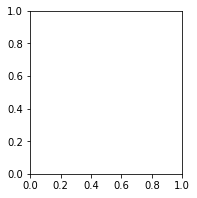

In [11]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions[i],  test_labels)
  plt.show()
  plt.clf()

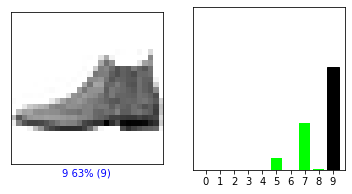

<Figure size 432x288 with 0 Axes>

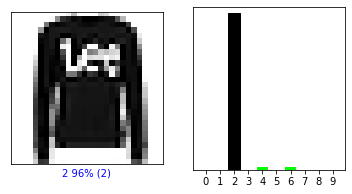

<Figure size 432x288 with 0 Axes>

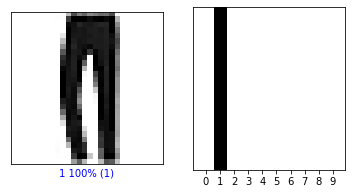

<Figure size 432x288 with 0 Axes>

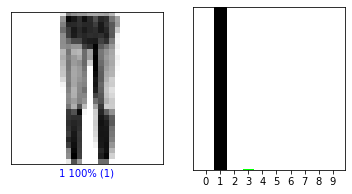

<Figure size 432x288 with 0 Axes>

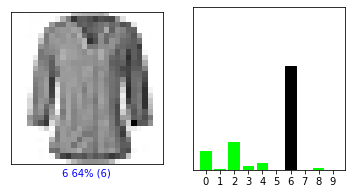

<Figure size 432x288 with 0 Axes>

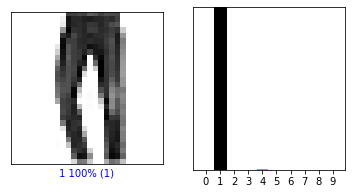

<Figure size 432x288 with 0 Axes>

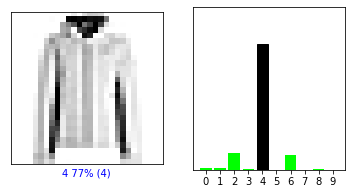

<Figure size 432x288 with 0 Axes>

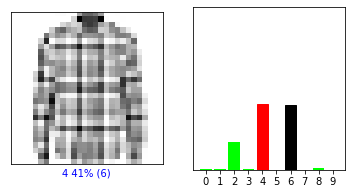

<Figure size 432x288 with 0 Axes>

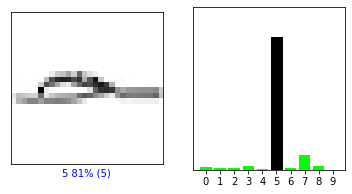

<Figure size 432x288 with 0 Axes>

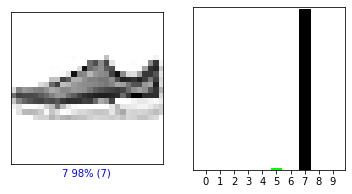

<Figure size 432x288 with 0 Axes>

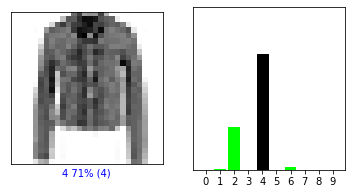

<Figure size 432x288 with 0 Axes>

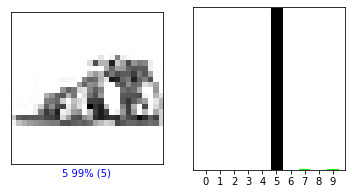

<Figure size 432x288 with 0 Axes>

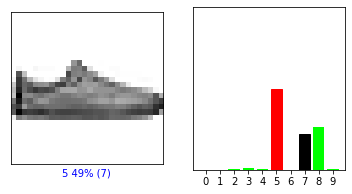

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions2[i],  test_labels)
  plt.show()
  plt.clf()

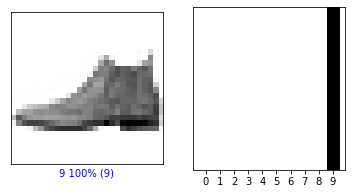

<Figure size 432x288 with 0 Axes>

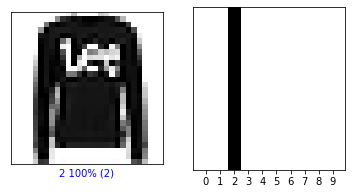

<Figure size 432x288 with 0 Axes>

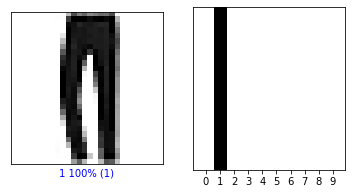

<Figure size 432x288 with 0 Axes>

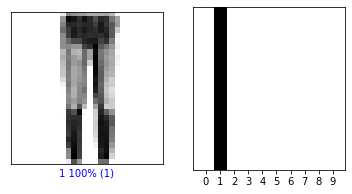

<Figure size 432x288 with 0 Axes>

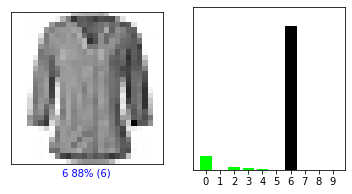

<Figure size 432x288 with 0 Axes>

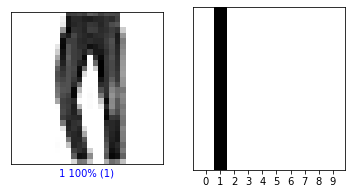

<Figure size 432x288 with 0 Axes>

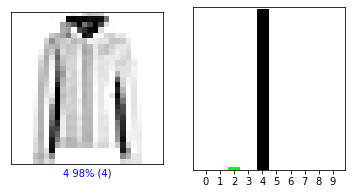

<Figure size 432x288 with 0 Axes>

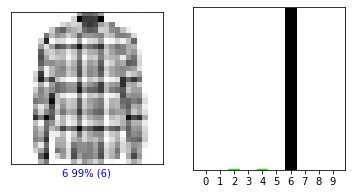

<Figure size 432x288 with 0 Axes>

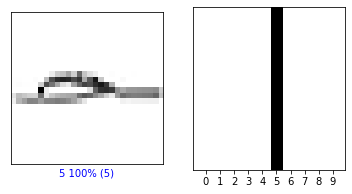

<Figure size 432x288 with 0 Axes>

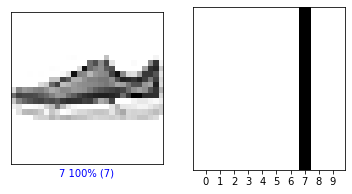

<Figure size 432x288 with 0 Axes>

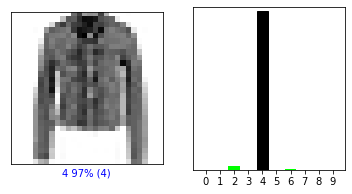

<Figure size 432x288 with 0 Axes>

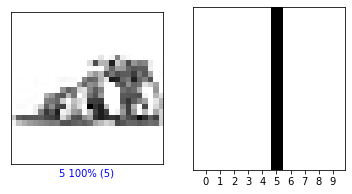

<Figure size 432x288 with 0 Axes>

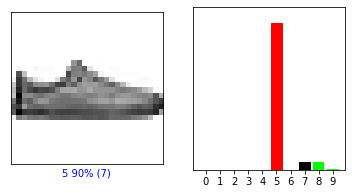

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions3[i],  test_labels)
  plt.show()
  plt.clf()

# Modelo con los conceptos batch_normalization y dropout 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10,'softmax'))


print('CASO 1 \n')
model.summary()

CASO 1 

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_20 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 batch_normalization_21 (Bat  (None, 8, 8, 6

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5521 - accuracy: 0.8097
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3978 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3451 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3222 - accuracy: 0.8823
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.8930


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
predictions = model.predict(test_images)

test_labels=test_labels.reshape(10000,)

313/313 [==============================] - 1s 2ms/step


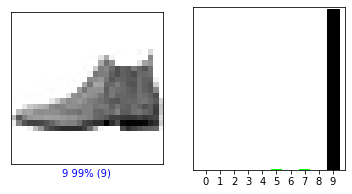

<Figure size 432x288 with 0 Axes>

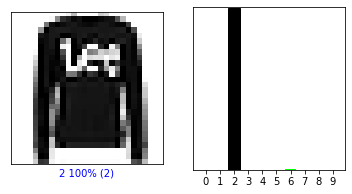

<Figure size 432x288 with 0 Axes>

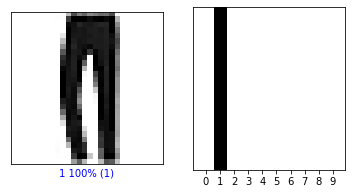

<Figure size 432x288 with 0 Axes>

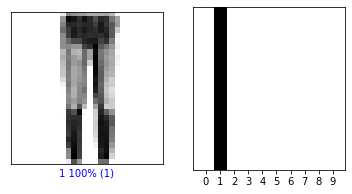

<Figure size 432x288 with 0 Axes>

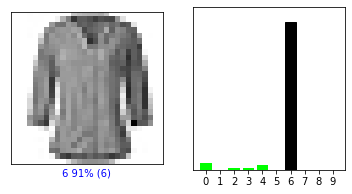

<Figure size 432x288 with 0 Axes>

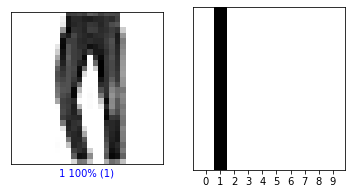

<Figure size 432x288 with 0 Axes>

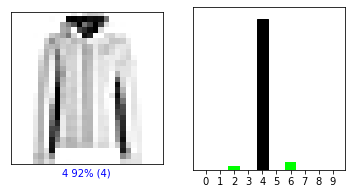

<Figure size 432x288 with 0 Axes>

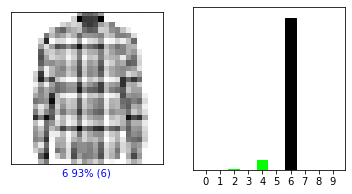

<Figure size 432x288 with 0 Axes>

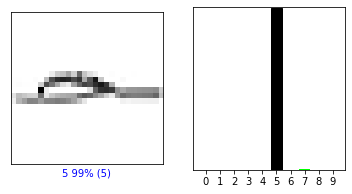

<Figure size 432x288 with 0 Axes>

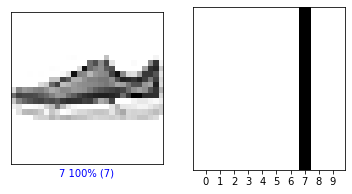

<Figure size 432x288 with 0 Axes>

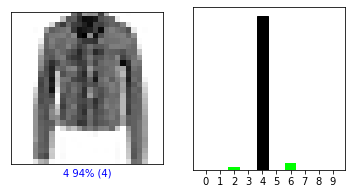

<Figure size 432x288 with 0 Axes>

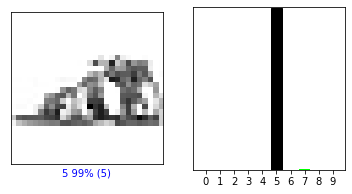

<Figure size 432x288 with 0 Axes>

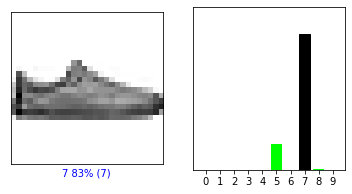

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()